In [ ]:
# Misc
def plot_accuracy_and_loss(history1, title1, history2, title2):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history1.history['accuracy'], label=f'{title1} Train Accuracy')
  plt.plot(history1.history['val_accuracy'], label=f'{title1} Val Accuracy')
  plt.plot(history2.history['accuracy'], label=f'{title2} Train Accuracy', linestyle='--')
  plt.plot(history2.history['val_accuracy'], label=f'{title2} Val Accuracy', linestyle='--')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(history1.history['loss'], label=f'{title1} Train Loss')
  plt.plot(history1.history['val_loss'], label=f'{title1} Val Loss')
  plt.plot(history2.history['loss'], label=f'{title2} Train Loss', linestyle='--')
  plt.plot(history2.history['val_loss'], label=f'{title2} Val Loss', linestyle='--')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

In [ ]:
!pip install ucimlrepo

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3919 - loss: 2.1490 - val_accuracy: 0.7050 - val_loss: 0.9451
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7620 - loss: 0.7677 - val_accuracy: 0.7815 - val_loss: 0.7050
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8308 - loss: 0.5389 - val_accuracy: 0.8400 - val_loss: 0.5224
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8760 - loss: 0.3933 - val_accuracy: 0.8770 - val_loss: 0.3990
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8979 - loss: 0.3157 - val_accuracy: 0.8840 - val_loss: 0.3827
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9212 - loss: 0.2449 - val_accuracy: 0.8860 - val_loss: 0.4064
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9290 - loss: 0.2212 - val_accuracy: 0.9010 - val_loss: 0.3309
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9468 - loss: 0.1787 - val_accuracy: 0.906

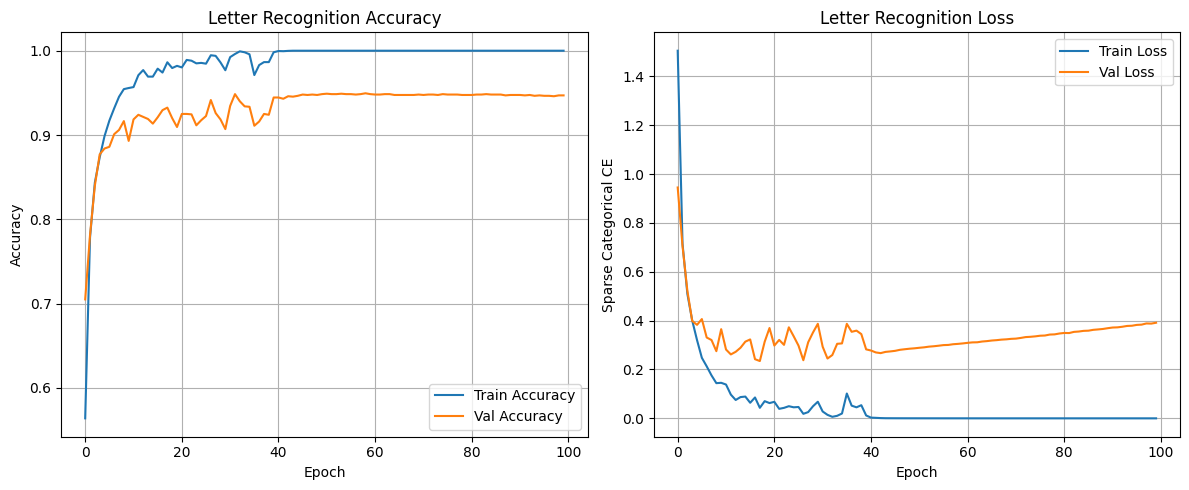

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

letters = fetch_ucirepo(id=59)
X_raw = letters.data.features
y_raw = letters.data.targets

y_series = y_raw.iloc[:, 0]
label_map = {chr(ord('A') + i): i for i in range(26)}
y = y_series.map(label_map).astype(int).values

# 3) Train/test split - tylko 0.3 do treningu i 0.1 do testów (reszta jako data augmentation)
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y,
    train_size=0.3,
    test_size=0.1,
    random_state=42,
    stratify=y
)

X_temp, X_test, y_temp, y_test = train_test_split(
    X_raw, y,
    test_size=0.10,
    stratify=y,
    random_state=42
)
X_train, X_pool, y_train, y_pool = train_test_split(
    X_temp, y_temp,
    train_size=0.3,
    stratify=y_temp,
    random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64,  activation='relu'),
    Dense(26,  activation='softmax')   # 26 outputów
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


start = time.time()
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start} sekund")


plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],  label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.title('Letter Recognition Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],      label='Train Loss')
plt.plot(history.history['val_loss'],  label='Val Loss')
plt.title('Letter Recognition Loss')
plt.xlabel('Epoch')
plt.ylabel('Sparse Categorical CE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


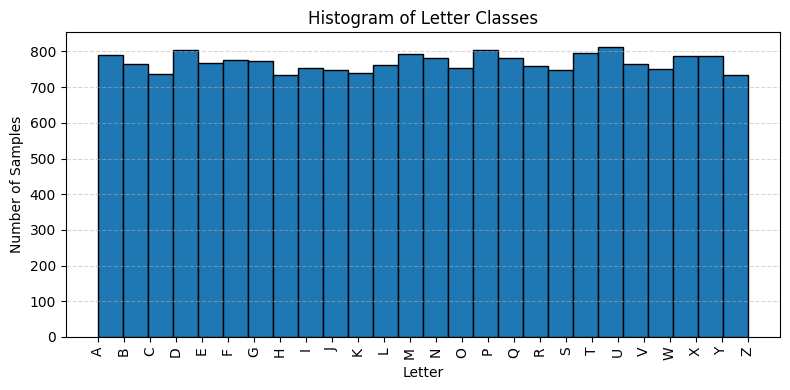

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

plt.figure(figsize=(8,4))
plt.hist(y, bins=26, edgecolor='k')
plt.xticks(range(26), [chr(ord('A')+i) for i in range(26)], rotation=90)
plt.title('Histogram of Letter Classes')
plt.ylabel('Number of Samples')
plt.xlabel('Letter')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

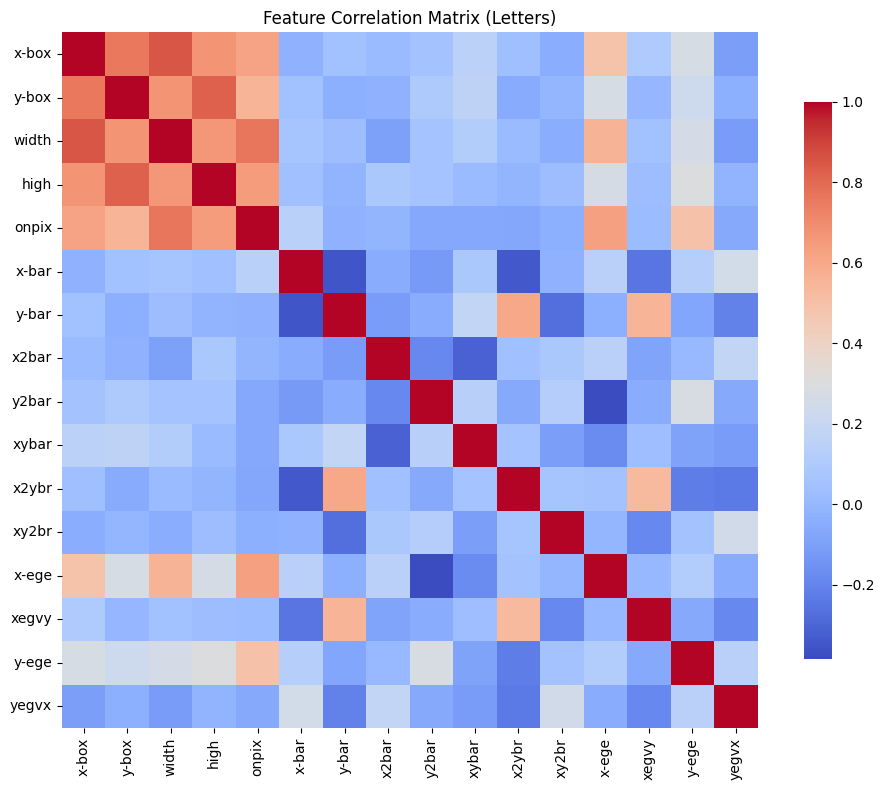

In [ ]:
plt.figure(figsize=(10,8))
corr_matrix = X_raw.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, cbar_kws={'shrink':.8})
plt.title('Feature Correlation Matrix (Letters)')
plt.tight_layout()
plt.show()

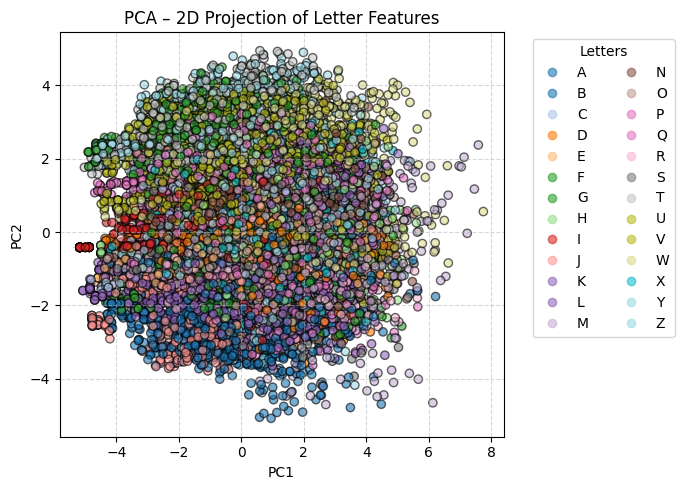

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=y, cmap='tab20', alpha=0.6, edgecolors='k'
)
plt.title('PCA – 2D Projection of Letter Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = scatter.legend_elements(num=26)
labels = [chr(ord('A') + i) for i in range(26)]
plt.legend(handles, labels, title="Letters",
           bbox_to_anchor=(1.05,1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


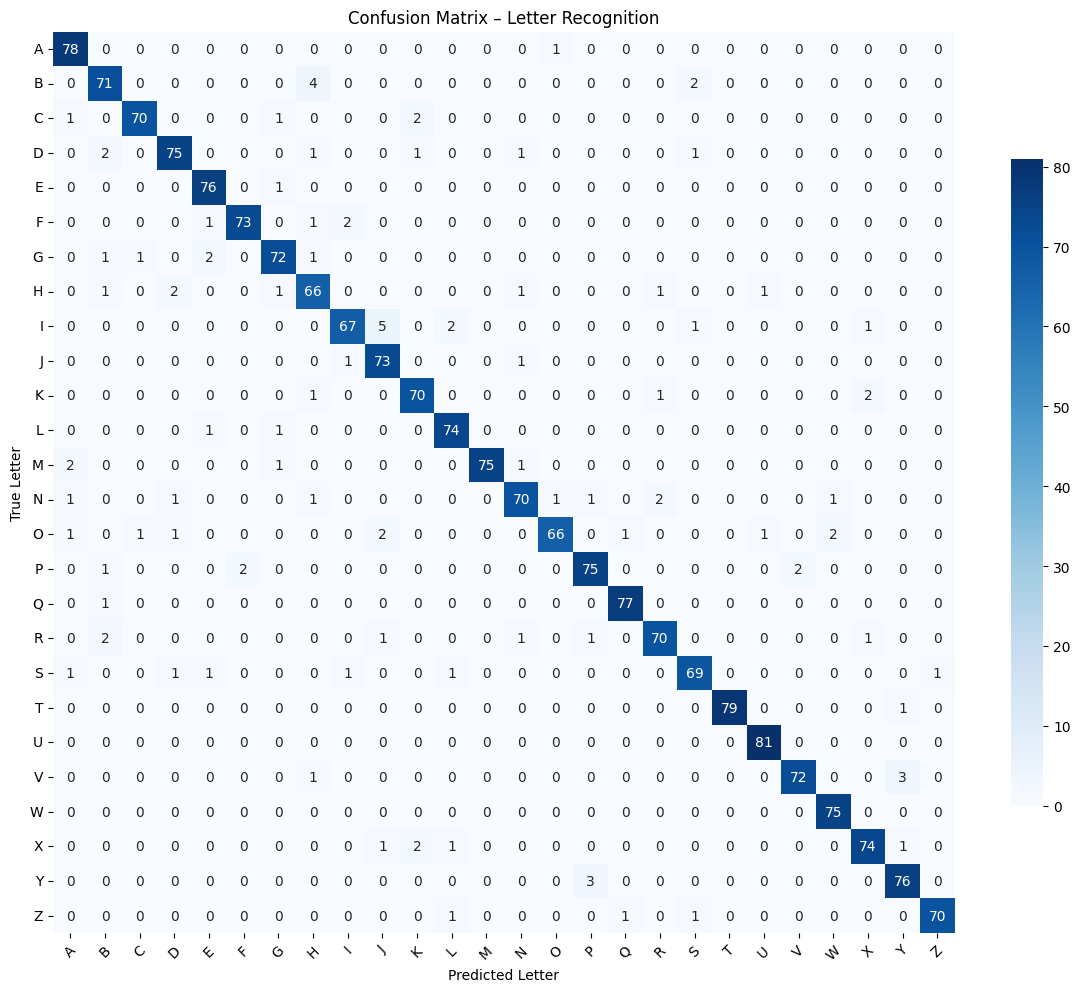

In [ ]:
import numpy as np
y_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(y_test, y_pred, labels=range(26))

plt.figure(figsize=(12,10))
sns.heatmap(
    cm,
    cmap='Blues',
    annot=True,
    fmt='d',
    xticklabels=[chr(ord('A')+i) for i in range(26)],
    yticklabels=[chr(ord('A')+i) for i in range(26)],
    square=True,
    cbar_kws={'shrink': .7}
)
plt.title('Confusion Matrix – Letter Recognition')
plt.xlabel('Predicted Letter')
plt.ylabel('True Letter')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
small_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64,  activation='relu'),
    Dense(32,  activation='relu'),
    Dense(26,  activation='softmax')   # 26 outputów
])

small_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


start = time.time()
small_history = small_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2569 - loss: 2.6918 - val_accuracy: 0.6280 - val_loss: 1.3002
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6493 - loss: 1.2044 - val_accuracy: 0.7360 - val_loss: 0.9339
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7518 - loss: 0.8550 - val_accuracy: 0.7860 - val_loss: 0.7661
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - loss: 0.6928 - val_accuracy: 0.8085 - val_loss: 0.6710
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8283 - loss: 0.5931 - val_accuracy: 0.8195 - val_loss: 0.6053
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.5312 - val_accuracy: 0.8410 - val_loss: 0.5467
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.4736 - val_accuracy: 0.8520 - val_loss: 0.5038
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8807 - loss: 0.3990 - val_accu

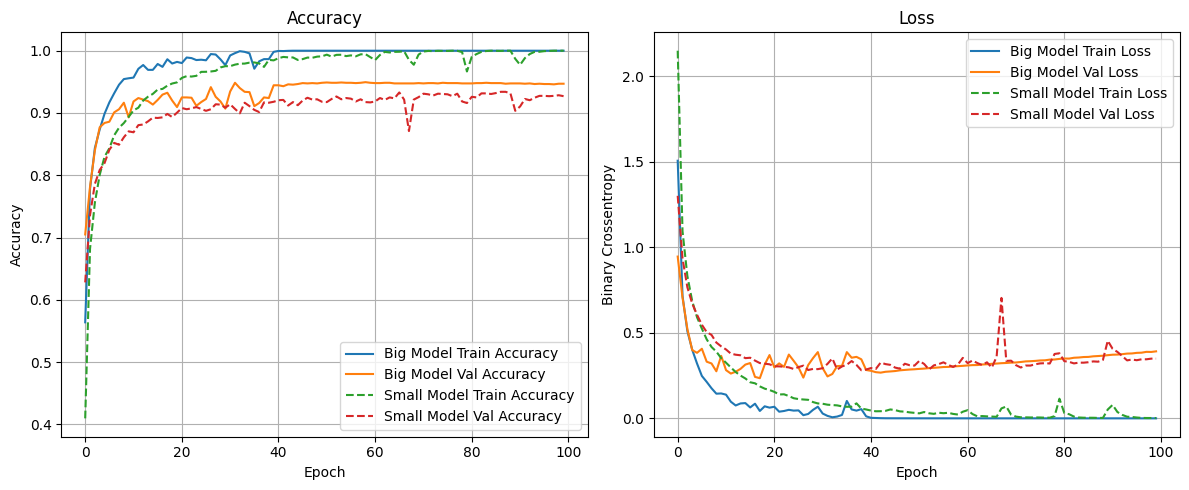

In [ ]:
plot_accuracy_and_loss(history, 'Big Model', small_history, 'Small Model')

# Ocena
Dla zbioru liter ewidentnie duża lizczba możliwych klas sprawia, że lepiej daje sobie radę większa sieć

# 2. Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
     Dropout(0.2),
    Dense(256, activation='relu'),
     Dropout(0.2),
    Dense(128, activation='relu'),
     Dropout(0.1),
    Dense(64,  activation='relu'),
    Dense(26,  activation='softmax')   # 26 outputów
])

dropout_model.compile(optimizer=Adam(5e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time.time()

dropout_history = dropout_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2257 - loss: 2.7777 - val_accuracy: 0.6435 - val_loss: 1.1791
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6304 - loss: 1.1748 - val_accuracy: 0.7460 - val_loss: 0.8380
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7207 - loss: 0.8792 - val_accuracy: 0.7955 - val_loss: 0.6829
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7619 - loss: 0.7339 - val_accuracy: 0.8110 - val_loss: 0.5991
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7953 - loss: 0.6249 - val_accuracy: 0.8350 - val_loss: 0.5288
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8227 - loss: 0.5656 - val_accuracy: 0.8435 - val_loss: 0.4895
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8404 - loss: 0.5052 - val_accuracy: 0.8665 - val_loss: 0.4284
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8551 - loss: 0.4360 - val_acc

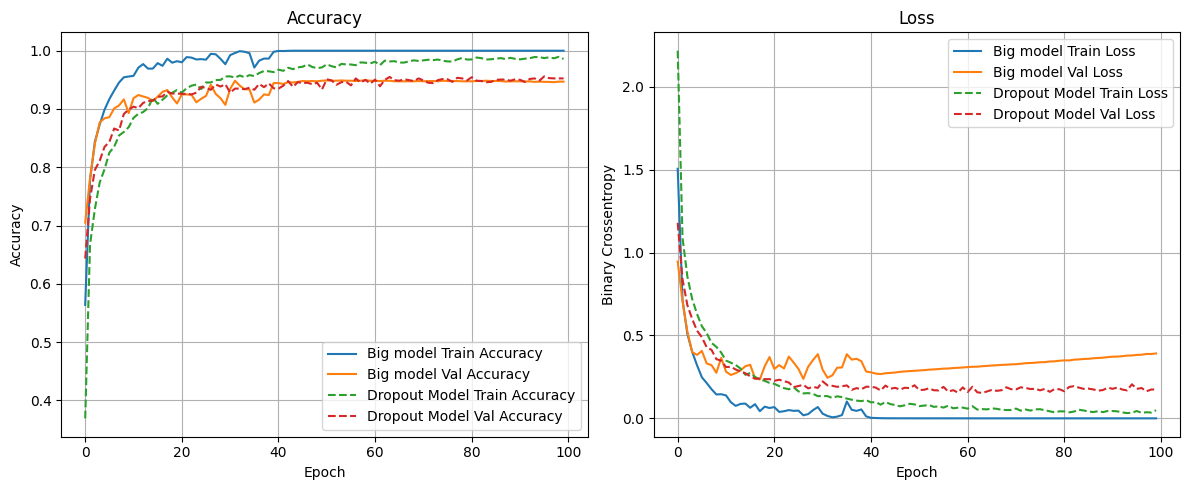

In [ ]:
plot_accuracy_and_loss(history, 'Big model', dropout_history, 'Dropout Model')

# Ocena
Starty odrobinę lepsze, za to celność się utrzymała

# 3. L2

In [ ]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Dense(512, activation='relu',
          kernel_regularizer=l2(1e-4),
          input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu',
          kernel_regularizer=l2(5e-5)),
    Dense(128, activation='relu',
          kernel_regularizer=l2(1e-5)),
    Dense(64, activation='relu',
          kernel_regularizer=l2(1e-6)),
    Dense(26,  activation='softmax')
])

l2_model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time.time()

l2_history = l2_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4080 - loss: 2.1476 - val_accuracy: 0.7125 - val_loss: 0.9447
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7607 - loss: 0.7796 - val_accuracy: 0.8220 - val_loss: 0.6179
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8379 - loss: 0.5457 - val_accuracy: 0.8260 - val_loss: 0.5781
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8715 - loss: 0.4522 - val_accuracy: 0.8480 - val_loss: 0.5078
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9031 - loss: 0.3461 - val_accuracy: 0.8845 - val_loss: 0.4148
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9229 - loss: 0.2795 - val_accuracy: 0.8645 - val_loss: 0.4588
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9307 - loss: 0.2616 - val_accuracy: 0.9125 - val_loss: 0.3114
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9382 - loss: 0.2188 - val_acc

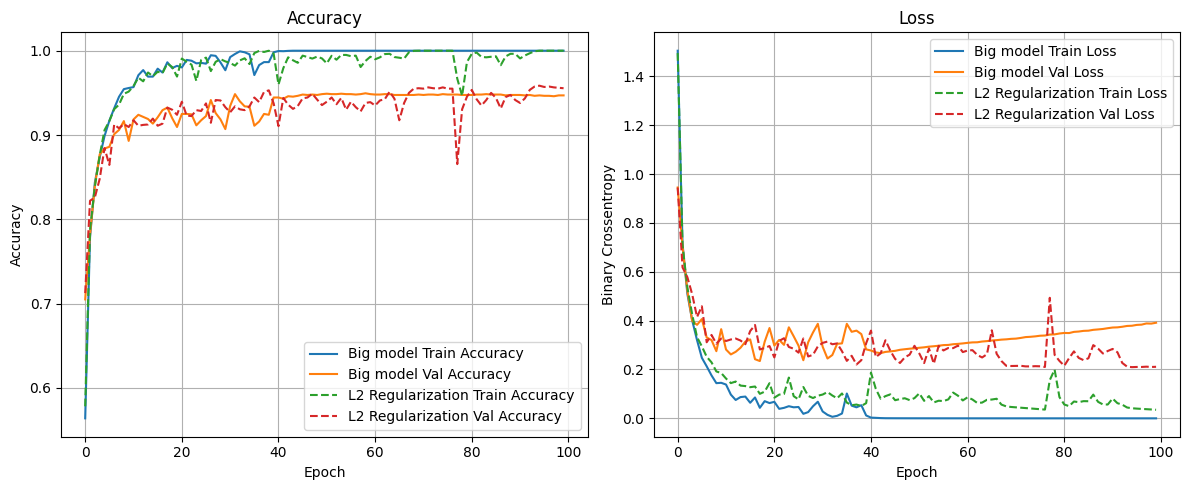

In [ ]:
plot_accuracy_and_loss(history, 'Big model', l2_history, 'L2 Regularization')

# Ocena

Odrobinę pomaga

# 4. L1

In [ ]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Dense(512, activation='relu',
          kernel_regularizer=l1(1e-3),
          input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu',
          kernel_regularizer=l1(5e-4)),
    Dense(128, activation='relu',
          kernel_regularizer=l1(1e-4)),
    Dense(64, activation='relu',
          kernel_regularizer=l1(1e-5)),
    Dense(26,  activation='softmax')
])

l1_model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start = time.time()
l1_history = l1_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3863 - loss: 4.8023 - val_accuracy: 0.6935 - val_loss: 2.3005
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7133 - loss: 2.1121 - val_accuracy: 0.7585 - val_loss: 1.7306
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7587 - loss: 1.6522 - val_accuracy: 0.7790 - val_loss: 1.5106
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7913 - loss: 1.4436 - val_accuracy: 0.7815 - val_loss: 1.3999
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8183 - loss: 1.2648 - val_accuracy: 0.8215 - val_loss: 1.2404
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8286 - loss: 1.1720 - val_accuracy: 0.8235 - val_loss: 1.1449
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8460 - loss: 1.0699 - val_accuracy: 0.8335 - val_loss: 1.0866
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8546 - loss: 1.0168 - val_acc

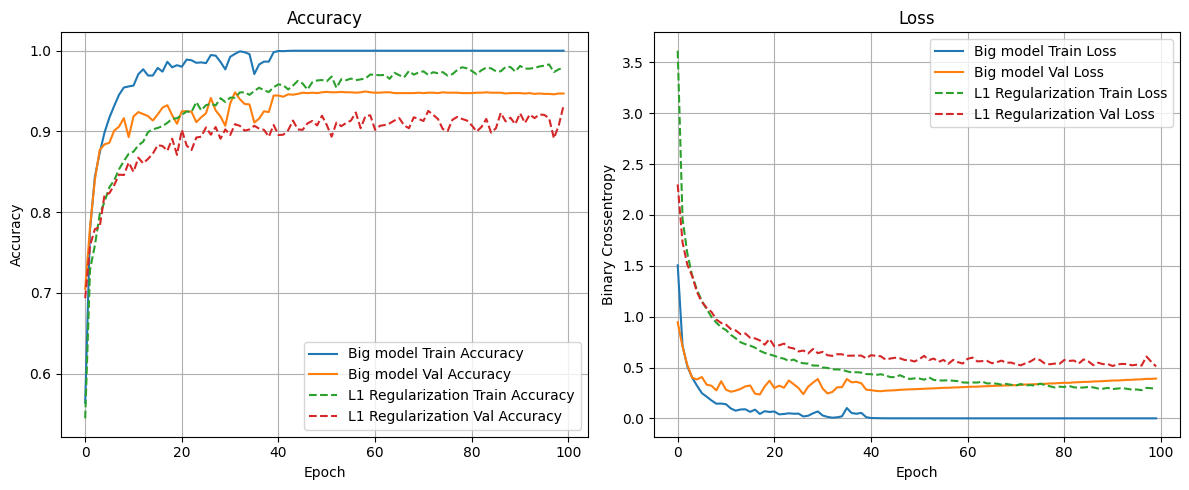

In [ ]:
plot_accuracy_and_loss(history, 'Big model', l1_history, 'L1 Regularization')

#Ocena
L1 nie daje rady nic poprawić, jest tylko gorzej

# 5. Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(26,  activation='softmax')
])

early_stop_model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start = time.time()

early_history = early_stop_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3868 - loss: 2.1673 - val_accuracy: 0.7200 - val_loss: 0.8940
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7793 - loss: 0.7443 - val_accuracy: 0.8130 - val_loss: 0.6010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8424 - loss: 0.5066 - val_accuracy: 0.8340 - val_loss: 0.5386
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8767 - loss: 0.3856 - val_accuracy: 0.8835 - val_loss: 0.3647
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9057 - loss: 0.2917 - val_accuracy: 0.8810 - val_loss: 0.3768
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9198 - loss: 0.2523 - val_accuracy: 0.9045 - val_loss: 0.3192
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9330 - loss: 0.2078 - val_accuracy: 0.9120 - val_loss: 0.2786
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9480 - loss: 0.1575 - val_accu

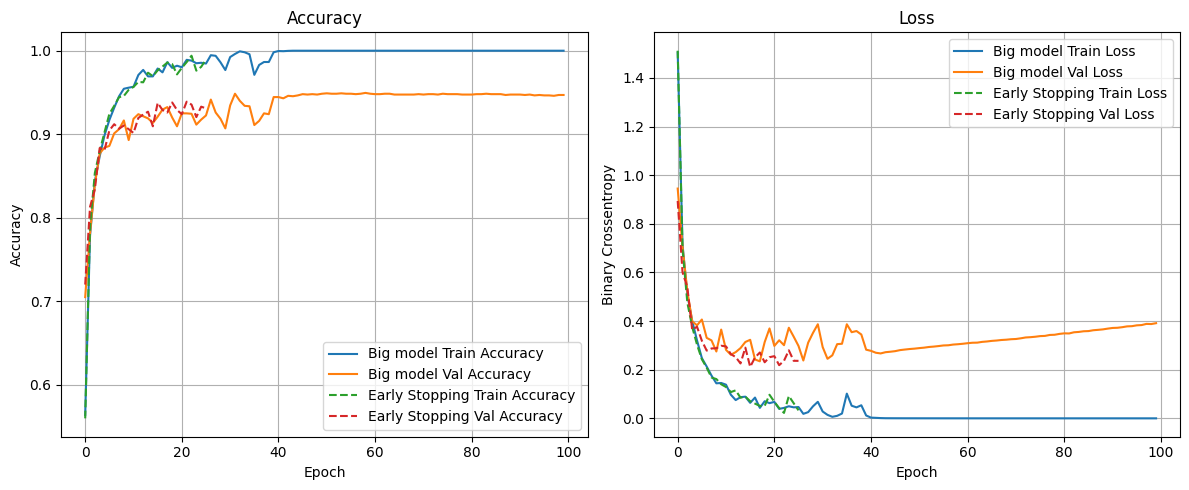

In [ ]:
plot_accuracy_and_loss(history, 'Big model', early_history, 'Early Stopping')

# Ocena
Early stopping nie poprawił wyniku ani trochę, ale za to osiągnął go dużo szybciej.

# 6. Data augmentation

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X_raw, y,
    test_size=0.10,
    stratify=y,
    random_state=42
)
X_train, X_pool, y_train, y_pool = train_test_split(
    X_temp, y_temp,
    train_size=0.3,
    stratify=y_temp,
    random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_pool_scaled  = scaler.transform(X_pool)

X_train_scaled = np.concatenate([X_train_scaled, X_pool_scaled])
y_train = np.concatenate([y_train, y_pool])


data_augmented_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64,  activation='relu'),
    Dense(26,  activation='softmax')   # 26 outputów
])

data_augmented_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


start = time.time()
data_augmented_history = data_augmented_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start} sekund")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5687 - loss: 1.5072 - val_accuracy: 0.8530 - val_loss: 0.4813
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8743 - loss: 0.3988 - val_accuracy: 0.8955 - val_loss: 0.3186
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9193 - loss: 0.2519 - val_accuracy: 0.9180 - val_loss: 0.2422
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9380 - loss: 0.1809 - val_accuracy: 0.9285 - val_loss: 0.2298
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9511 - loss: 0.1448 - val_accuracy: 0.9450 - val_loss: 0.1673
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9583 - loss: 0.1220 - val_accuracy: 0.9475 - val_loss: 0.1599
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9667 - loss: 0.0996 - val_accuracy: 0.9520 - val_loss: 0.1522
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9691 - loss: 0.0901 - val_accuracy: 0.9515

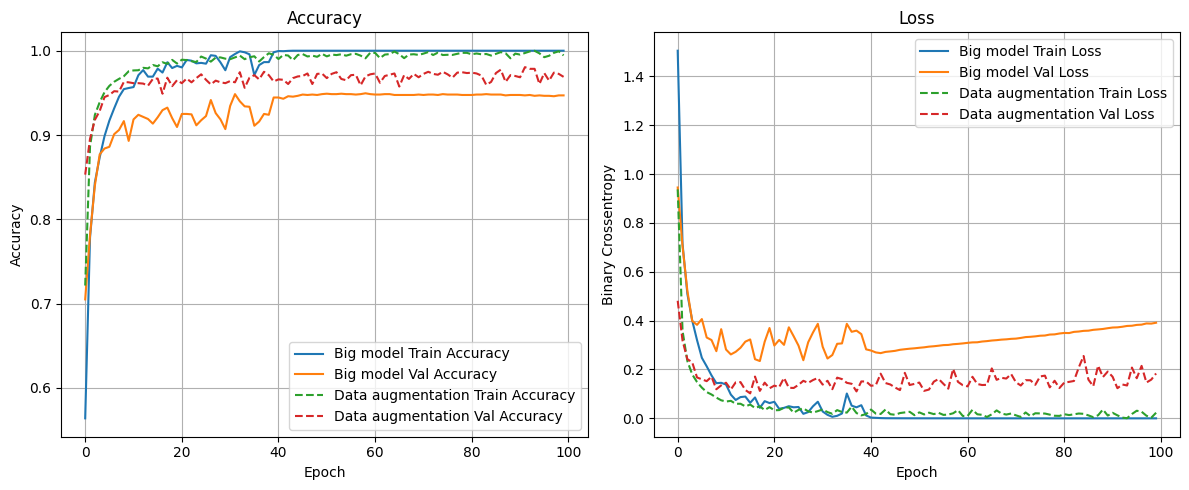

In [ ]:
plot_accuracy_and_loss(history, 'Big model', data_augmented_history, 'Data augmentation')

# Ocena

W tym przypadku dodanie dodatkowych danych do nauki jest najlepszym sposobem na poprawienie celności i strat w sieci.